# importo file training

In [232]:
import numpy as np
import matplotlib.pyplot as plt
run = 14
a = np.loadtxt(f'runs/{run}/training.dat')
ncritic=31
print(len(a)/ncritic)
# 0 epoch
# 1 gen_iter
# 2 critic_iter
# 3 d_loss_tot
# 4 d_loss_true
# 5 d_loss_fake
# 6 d_loss_gp
# 7 d_loss_tot_test
# 8 d_loss_true_test
# 9 d_loss_fake_test
# 10 d_loss_gp_test
# 11 g_loss

plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

3400.0


# plotto d_loss_training - d_loss_test

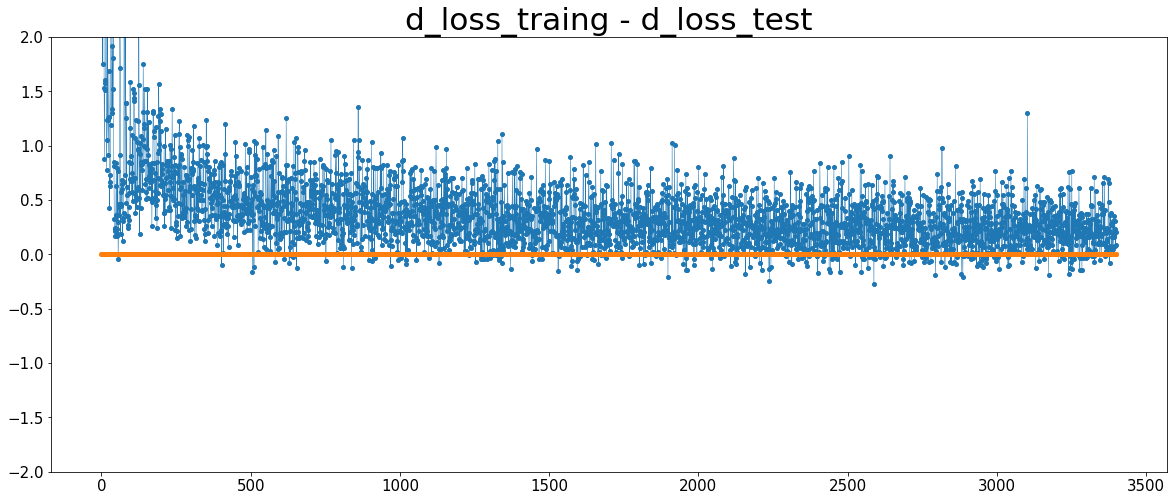

In [233]:
every = ncritic*1
ms = 2
#plt.scatter(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),1], label='d_loss', s=ms)
#plt.scatter(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),5], label='d_loss_test', s=ms)
plt.title("d_loss_traing - d_loss_test")
plt.plot(a[np.arange(0,a.shape[0],every),1], a[np.arange(0,a.shape[0],every),3]-a[np.arange(0,a.shape[0],every),7], label='difference')
plt.plot(a[np.arange(0,a.shape[0],every),1], [0.]*len(a[np.arange(0,a.shape[0],every),1]))
plt.ylim([-2,2])
plt.show()

# plotto d_loss_true, d_loss_fake, d_loss_gp*10

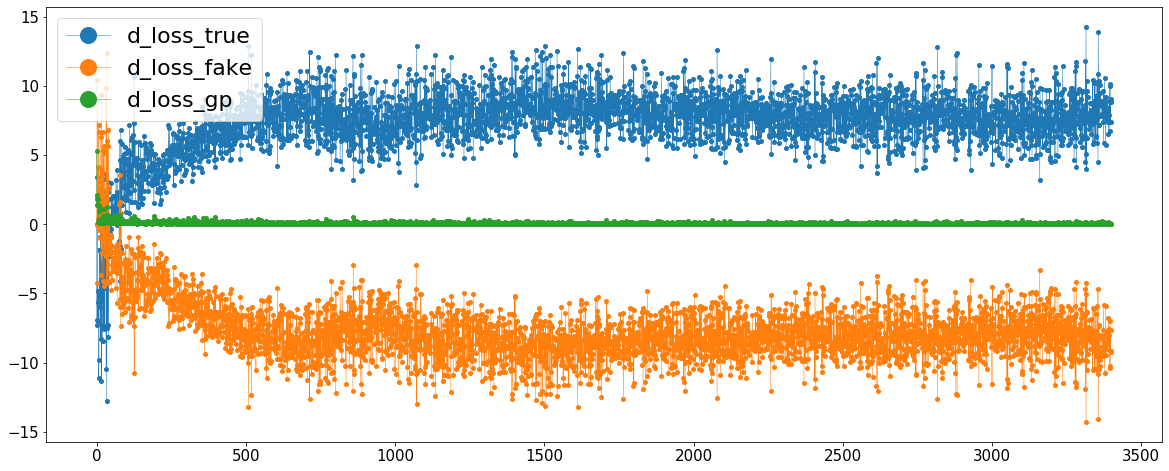

In [234]:
every = ncritic*1
ms = 2
plt.plot(a[0:a.shape[0]:every,1], a[0:a.shape[0]:every,4], label='d_loss_true')
plt.plot(a[0:a.shape[0]:every,1], a[0:a.shape[0]:every,5], label='d_loss_fake')
plt.plot(a[0:a.shape[0]:every,1], 10*a[0:a.shape[0]:every,6], label='d_loss_gp')
#plt.ylim([-2,2])
plt.legend()
plt.show()

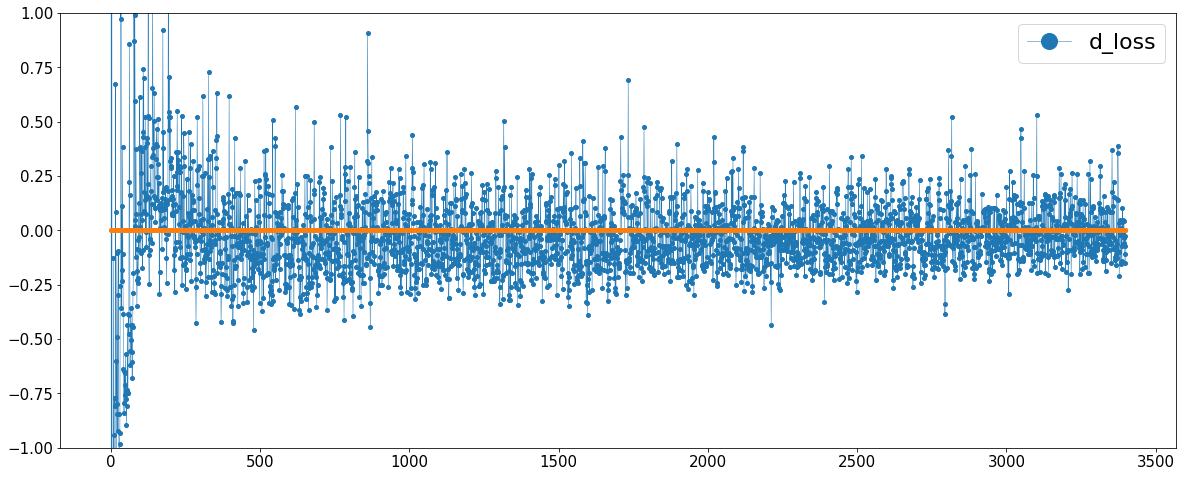

In [236]:
every = ncritic * 1
plt.plot(a[np.arange(0,a.shape[0],every),1], a[np.arange(0,a.shape[0],every),3], label='d_loss')
plt.plot(a[np.arange(0,a.shape[0],every),1], [0.]*len(a[np.arange(0,a.shape[0],every),2]))
plt.ylim([-1,1])
plt.legend()
plt.show()

# plotto d_loss tra una iterazione del generatore e l'altra

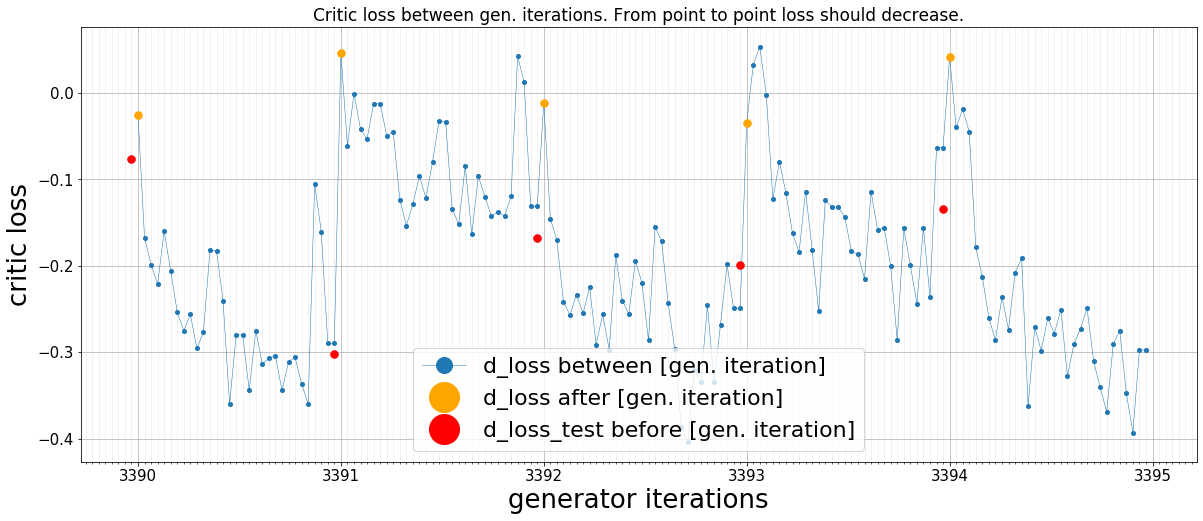

In [237]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
nn = 5
every = ncritic
start_gen_iter = int(len(a)/ncritic) - nn*2
start = (start_gen_iter)*every
# number of gen_iter to show
end = (start_gen_iter+nn)*every

ax.plot(np.arange(start//every,end//every,1./every), a[start:end,3], label='d_loss between [gen. iteration]')
ax.plot(a[start:end:every,1], a[start:end:every,3], lw=0, color='orange', markersize=15, label='d_loss after [gen. iteration]')
ax.plot(a[start:end:every,1]-1./every, a[start:end:every,7], lw=0, markersize=15, color='red', label='d_loss_test before [gen. iteration]')
ax.legend()
ax.set_xlabel('generator iterations')
ax.set_ylabel('critic loss')
ax.set_title('Critic loss between gen. iterations. From point to point loss should decrease.',fontsize=17)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(1/(ncritic)))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.9)

fig.savefig(f'../plots/training_run_{run}',dpi=100,fmt='png')
fig.show()

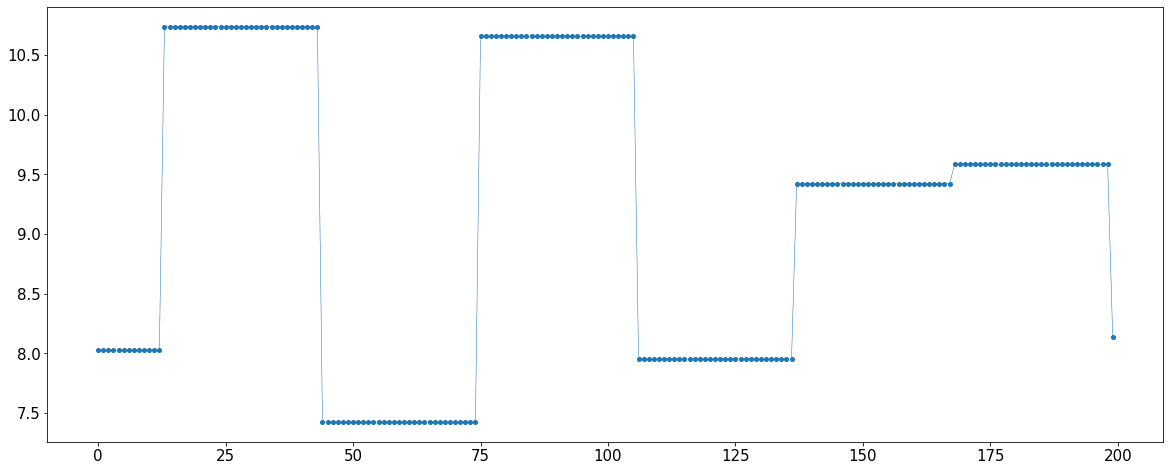

In [238]:
plt.plot(a[-200:,11])